In [ ]:
import os
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph.
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [ ]:
df=pd.read_csv("/content/supervised_data_keywords2.csv")

In [ ]:
df.text[1]

'Mamata cries foul over BJP’s fact-finding report on Birbhum violence\nInterference by a party at this stage will mean misleading and distorting the probe and people will lose confidence in the investigation, she says\n\nMembers of BJP’s fact-finding committee hand over their official report regarding the Birbhum-violence, where nine people were burnt alive in the Rampurhat area, to BJP National President JP Nadda, in New Delhi, on March 30, 2022. | Photo Credit: PTI\n\nInterference by a party at this stage will mean misleading and distorting the probe and people will lose confidence in the investigation, she says\n\nWest Bengal Chief Minister Mamata Banerjee on Wednesday expressed serious reservations over a BJP delegation submitting a report to party president J. P. Nadda on the Rampurhat massacre.\n\nShe said interference by a party at this stage would mean misleading and distorting the investigation and people would lose confidence in the probe.\n\nNine killed\n\nNine people lost t

In [ ]:
import nltk 
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
text=["raj living in delhi"]
for i in text:
  print(lemmatizing(i))

NameError: ignored

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
def remove_punct(text):
    text = re.sub('[^a-zA-Z]',' ',text)
    return text

def remove_stopwords(text):
    text = text.split()
    text = [w for w in text if not w in stop_words]
    text = ' '.join(text)
    return text

lemmatizer = WordNetLemmatizer()
def lemmatizing(text):
    text = text.lower()
    text = text.split()
    word =[]
    for i in text:
        word.append(lemmatizer.lemmatize(i))
    text = ' '.join(word)
    return text

In [ ]:
df['text'] = df['text'].apply(remove_punct)

In [ ]:
df['text'] = df['text'].apply(remove_stopwords)

In [ ]:
nltk.download('wordnet')
df['text'] = df['text'].apply(lemmatizing)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df["text"]

0      man arrested selling opium the city police arr...
1      mamata cry foul bjp fact finding report birbhu...
2      bengal governor seek interaction cm rampurhat ...
3      all sample seized narcotic psychotropic drug n...
4      mumbai three arrested anc r cr drug seized in ...
                             ...                        
299    hero motocorp tax case i t find r cr siphoned ...
300    maharashtra cbi allowed seek custody anil desh...
301    maharashtra enforcement directorate nabs lawye...
302    ed arrest nagpur lawyer filed case devendra fa...
303    enforcement directorate attache cr property am...
Name: text, Length: 304, dtype: object

In [ ]:
df

,text,keyword
0,man arrested selling opium the city police arr...,opium
1,mamata cry foul bjp fact finding report birbhu...,CBI
2,bengal governor seek interaction cm rampurhat ...,CBI
3,all sample seized narcotic psychotropic drug n...,Central Bureau of Investigation | National Inv...
4,mumbai three arrested anc r cr drug seized in ...,narcotics
...,...,...
299,hero motocorp tax case i t find r cr siphoned ...,siphoned
300,maharashtra cbi allowed seek custody anil desh...,CBI | NIA | enforcement directorate | money la...
301,maharashtra enforcement directorate nabs lawye...,CBI | enforcement directorate | money laundering
302,ed arrest nagpur lawyer filed case devendra fa...,CBI | enforcement directorate


In [ ]:
pd.DataFrame(df.keyword.unique()).values

array([['opium'],
       ['CBI'],
       ['Central Bureau of Investigation | National Investigation Agency | drug contraband | narcotics'],
       ['narcotics'],
       ['CBI | Central Bureau of Investigation'],
       ['NIA | National Investigation Agency | heroin | smuggling'],
       ['terror'],
       ['CBI | Central Bureau of Investigation | enforcement directorate | smuggling'],
       ['fraud'],
       ['Central Bureau of Investigation | drug contraband | narcotics'],
       ['enforcement directorate | money laundering | smuggling'],
       ['smuggling'],
       ['drug illegal'],
       ['siphoned'],
       ['ganja'],
       ['NIA | National Investigation Agency'],
       ['drug contraband | narcotics'],
       ['enforcement directorate | money laundering'],
       ['drug contraband | heroin | narcotics'],
       ['heroin | narcotics'],
       ['drug trafficking | heroin | human trafficking'],
       ['narcotics | opium'],
       ['CBI | smuggling'],
       ['CBI | Central Burea

In [ ]:
df.replace({'keyword': 
             {
              "NIA | terror" : "terrorism",
              "heroin | narcotics" : "drugs",
              
              "drug illegal | drug trafficking | narcotics" :"drugs",
              "drug trafficking | heroin | human trafficking" : "human trafficking",
              "CBI | smuggling" : "drugs",
              "National Investigation Agency" : "terrorism",
              'drug illegal | money launder | money laundering' : "money laundering",
              "NIA | National Investigation Agency | heroin" : "drugs",
              "Hawala"  : "CBI or others" ,
              'Hawala | NIA | National Investigation Agency | drug contraband | heroin | smuggling' : "drugs" ,
              "CBI | Central Bureau of Investigation | drug illegal | enforcement directorate" : "drugs",
              "CBI | enforcement directorate | fraud | money laundering" : "money laundering",
              "drug arrest | drug seize | heroin" : "drugs" ,
              'enforcement directorate | money laundering | siphoned' : "money laundering",
              "NIA | National Investigation Agency | terror" : "terrorism",
              "NIA" : "terrorism" ,
               "money laundering | terror" : "money laundering",
              "CBI | enforcement directorate" : "CBI or others",
              "Central Bureau of Investigation | enforcement directorate | money laundering" : "money laundering",
              "Central Bureau of Investigation" : "CBI or others",
              "ganja | narcotics" : "drugs" ,
              'CBI | Central Bureau of Investigation | National Investigation Agency | enforcement directorate | smuggling' : "drugs" ,
              "drug arrest | drug illegal | drug seize | ganja | smuggling" : "drugs",
              "drug illegal | smuggling" : "drugs",




              'Hawala | fraud | siphoned' : "fraud",
              "drug arrest | drug illegal"  : "drugs",
              "drug arrest | drug illegal | terror" : "drugs",
              "money laundering | siphoned" : "money laundering",

              "fraud | money laundering" : "money laundering" ,
              "National Investigation Agency | terror" : "terrorism",
              "drug arrest | ganja | narcotics" : "drugs",
              'drug arrest | drug contraband | ganja' : "drugs",
              "CBI | NIA | enforcement directorate | money laundering" : "money laundering",
              "CBI | Hawala | enforcement directorate" : "CBI or others",
              "NIA | National Investigation Agency | heroin | terror" : "terrorism",
              "CBI | NIA | enforcement directorate | money laundering | terror" : "money laundering" ,
              "Central Bureau of Investigation | National Investigation Agency | enforcement directorate" : "CBI or others",
              "drug confiscate | drug seize | narcotics" : "drugs" ,
              "National Investigation Agency | narcotics" : "drugs" ,
              "CBI | Central Bureau of Investigation | NIA | National Investigation Agency | terror" :  "terrorism",
              "enforcement directorate | siphoned" : "fraud",
              "smuggling | terror | terror financing" : "terrorism" ,



      
              
              
              'CBI | enforcement directorate | money laundering': 
              'money laundering', 
              'CBI | Central Bureau of Investigation' : 'CBI or others',
             'CBI | National Investigation Agency': 'CBI or others',
             'CBI' : 'CBI or others',
             'terror': 'terrorism',
             'narcotics': 'drugs',
             'enforcement directorate | money laundering': 'money laundering',
              'ganja':'drugs',
              'CBI | terror':'terrorism',
              'heroin':'drugs',
              'CBI | Central Bureau of Investigation | enforcement directorate':"money laundering",
              "narcotics | opium | smuggling":"drugs",
              "smuggling":"drugs",
              "drug contraband | heroin | opium":  "drugs",
              "ganja | smuggling":"drugs",
              "CBI | Central Bureau of Investigation | enforcement directorate | money laundering | siphoned":"money laundering",
              "CBI | Central Bureau of Investigation | fraud":  "CBI or others",
              "fraud | siphoned"  : "CBI or others",
              'enforcement directorate | fraud' :    "money laundering",
              "CBI | Central Bureau of Investigation | National Investigation Agency" :   "CBI or others",
              'CBI | money laundering' :   "money laundering",
              'Central Bureau of Investigation | NIA | National Investigation Agency' : "CBI or others",
              "CBI | Central Bureau of Investigation | smuggling" : "drugs",
              "drug arrest | narcotics" : "drugs",
              "drug arrest | ganja" :   "drugs",
              "money launder" :  "money laundering",
              "plastic money" :  "money laundering",
              "enforcement directorate | fraud | money laundering" : "money laundering",
              "CBI | Central Bureau of Investigation | enforcement directorate | fraud | money laundering" : "money laundering",
              "CBI | Central Bureau of Investigation | enforcement directorate | money laundering" : "money laundering",
              "CBI | Central Bureau of Investigation | enforcement directorate | smuggling" : "money laundering",
              "enforcement directorate" : "money laundering",
              "NIA | National Investigation Agency":"CBI or others",
              "Central Bureau of Investigation | narcotics" : "drugs",
              "drug contraband | heroin | narcotics" :"drugs",
              "drug contraband | heroin | narcotics":"drugs",
              "sex racket" : "human trafficking",
              "narcotics | opium": "drugs",
              "opium" : "drugs",
              "Central Bureau of Investigation | National Investigation Agency | drug contraband | narcotics" : "drugs",
              'NIA | National Investigation Agency | heroin | smuggling' : "drugs",
              'Central Bureau of Investigation | drug contraband | narcotics'  :   "drugs",
              "enforcement directorate | money laundering | smuggling" : "money laundering",
              "drug illegal" :  "drugs",
              "siphoned"  : "fraud",
              "drug contraband | narcotics" :  "drugs",
              "enforcement directorate | smuggling" : "drugs",
              "drug contraband | narcotics" : "drugs"
              





              
              
              
              }}, 
            inplace= True)
pd.DataFrame(df.keyword.unique())


,0
0,drugs
1,CBI or others
2,terrorism
3,money laundering
4,fraud
5,human trafficking


In [ ]:
pd.DataFrame(df.keyword.value_counts())

,keyword
CBI or others,106
drugs,70
money laundering,57
terrorism,36
fraud,29
human trafficking,6


In [ ]:
df['category_id'] = df['keyword'].factorize()[0]

In [ ]:
category_id_df = df[['keyword', 'category_id']].drop_duplicates()

In [ ]:
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'keyword']].values)

In [ ]:
category_id_df

,keyword,category_id
0,drugs,0
1,CBI or others,1
9,terrorism,2
12,money laundering,3
16,fraud,4
36,human trafficking,5


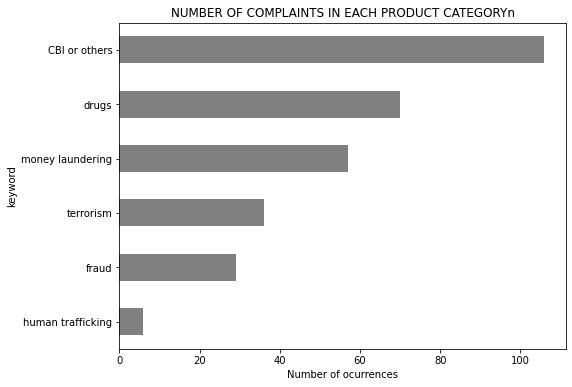

In [ ]:
fig = plt.figure(figsize=(8,6))
colors = ['grey','grey','grey','grey','grey','grey','grey','grey','grey',
    'grey','darkblue','darkblue','darkblue']
df.groupby('keyword').text.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORYn')
plt.xlabel('Number of ocurrences', fontsize = 10);

In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')
# We transform each complaint into a vector
features = tfidf.fit_transform(df.text).toarray()
labels = df.category_id
print("Each of the %d doucuments is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 304 doucuments is represented by 1913 features (TF-IDF score of unigrams and bigrams)


In [ ]:
N = 3
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("n==> %s:" %(Product))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))

n==> CBI or others:
  * Most Correlated Unigrams are: rampurhat, birbhum, cbi
  * Most Correlated Bigrams are: west bengal, mamata banerjee, cbi probe
n==> drugs:
  * Most Correlated Unigrams are: narcotic, ganja, drug
  * Most Correlated Bigrams are: seized kg, aryan khan, kg ganja
n==> fraud:
  * Most Correlated Unigrams are: share, fraud, duped
  * Most Correlated Bigrams are: record statement, fraud case, bank account
n==> human trafficking:
  * Most Correlated Unigrams are: suit, trafficking, human
  * Most Correlated Bigrams are: registered case, session judge, woman child
n==> money laundering:
  * Most Correlated Unigrams are: directorate, ed, laundering
  * Most Correlated Bigrams are: directorate ed, enforcement directorate, money laundering
n==> terrorism:
  * Most Correlated Unigrams are: terrorist, encounter, terror
  * Most Correlated Bigrams are: terrorist killed, killed encounter, militant killed


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is d

In [ ]:
X = df['text'] # Collection of documents
y = df['keyword'] # Target or the labels we want to predict 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state = 0)

In [ ]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

In [ ]:
# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

In [ ]:
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [ ]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.743607,0.058989
LogisticRegression,0.647978,0.034531
MultinomialNB,0.631530,0.036452
RandomForestClassifier,0.628361,0.036820


In [ ]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df.index, test_size=0.2, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Classification report
print('ttttCLASSIFICATIION METRICSn')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= df['keyword'].unique()))

ttttCLASSIFICATIION METRICSn
                   precision    recall  f1-score   support

            drugs       0.75      0.69      0.72        13
    CBI or others       0.44      0.75      0.56        20
        terrorism       1.00      0.25      0.40         8
 money laundering       0.70      0.58      0.64        12
            fraud       0.33      0.17      0.22         6
human trafficking       0.00      0.00      0.00         2

         accuracy                           0.56        61
        macro avg       0.54      0.41      0.42        61
     weighted avg       0.61      0.56      0.54        61



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred

array([1, 1, 1, 4, 1, 0, 1, 2, 1, 3, 1, 4, 3, 1, 3, 3, 0, 3, 1, 1, 1, 3,
       3, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 3, 1, 1, 2, 4,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 3, 0, 1, 3, 1, 1])

In [ ]:
t=np.array(y_test)
t

array([3, 1, 0, 3, 3, 0, 1, 2, 5, 1, 1, 1, 1, 2, 3, 3, 0, 1, 1, 3, 1, 3,
       3, 0, 2, 1, 2, 1, 4, 2, 4, 3, 1, 0, 4, 5, 0, 1, 0, 3, 4, 0, 2, 4,
       1, 2, 1, 0, 1, 1, 0, 1, 2, 0, 4, 3, 0, 1, 3, 1, 0])

In [ ]:
text = '''"ED attaches Uddhav Thackeray kinâ€™s assets; MVA cries vendetta

MUMBAI: The Enforcement Directorate has provisionally attached properties worth Rs 6.45 crore, including 11 residential flats at Thane, belonging to a company controlled and owned by Shridhar Madhav Patankar, brother-in-law of chief minister Uddhav Thackeray . Patankar is brother of Rashmi Thackeray, wife of the CM and editor of Saamna newspaper. The action against Shree Saibaba Grihanirmiti Pvt Ltd was linked to a five-year-old money laundering case. The ED in a press release said the Pushpak Group, which was under investigation for money laundering, had diverted unaccounted funds into the bank accounts of Shree Saibaba Grihanirmiti, which was then used for purchasing 11 flats in the Neelambari Project at Thane. Patankar was not reachable for comment. Earlier ED had summoned him but he failed to present himself to record a statement, said sources. The move by the ED drew sharp reactions from the parties which make up the ruling coalition in Maharashtra. NCP chief Sharad Pawar said, â€œThe biggest problem is the gross abuse of central agencies to settle political scores. Prima facie, it appears that it is political vendetta , it is a politically motivated action.â€ Pawar said a decade ago, no one even knew the existence of the ED. However, now the agency had become a household name. Sena MP Sanjay Raut said, â€œIt seems that ED is active only in those states where there is a non-BJP government..â€ The attachment had its origin in a demonetisation case involving Pushpak Bullion in 2017 when Sena and BJP were in an alliance. The ED had then registered a money laundering case against Pushpak group companies and arrested the promoter Chandrakant Patel. It was alleged that Patel accepted Rs 84 crore during demonetisation which were proceeds from sale of 258kg of gold."
'''

In [ ]:
text

array([['"ED attaches Uddhav Thackeray kinâ€™s assets; MVA cries vendetta\n\nMUMBAI: The Enforcement Directorate has provisionally attached properties worth Rs 6.45 crore, including 11 residential flats at Thane, belonging to a company controlled and owned by Shridhar Madhav Patankar, brother-in-law of chief minister Uddhav Thackeray . Patankar is brother of Rashmi Thackeray, wife of the CM and editor of Saamna newspaper. The action against Shree Saibaba Grihanirmiti Pvt Ltd was linked to a five-year-old money laundering case. The ED in a press release said the Pushpak Group, which was under investigation for money laundering, had diverted unaccounted funds into the bank accounts of Shree Saibaba Grihanirmiti, which was then used for purchasing 11 flats in the Neelambari Project at Thane. Patankar was not reachable for comment. Earlier ED had summoned him but he failed to present himself to record a statement, said sources. The move by the ED drew sharp reactions from the parties which

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')
fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)
model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

In [ ]:
import pickle
with open("tfidf.pkl", 'wb') as file:
    pickle.dump(tfidf, file)

In [ ]:
print(model.predict(fitted_vectorizer.transform([text])))

['money laundering']


In [ ]:
import joblib
filename = 'model.sav'
joblib.dump(model, filename)

['model.sav']

In [ ]:
loaded_model = joblib.load(filename)
loaded_model.predict(fitted_vectorizer.transform([text]))

array(['money laundering'], dtype=object)

In [ ]:
vectorizer = pickle.load(open("tfidf.pkl", "rb"))
'''
retfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english',vocabulary="vocab.pkl")
'''
#retfidfvect=retfidf.fit_transform([text])
k=loaded_model.predict(vectorizer.transform([text]))

In [ ]:
text

'"ED attaches Uddhav Thackeray kinâ€™s assets; MVA cries vendetta\n\nMUMBAI: The Enforcement Directorate has provisionally attached properties worth Rs 6.45 crore, including 11 residential flats at Thane, belonging to a company controlled and owned by Shridhar Madhav Patankar, brother-in-law of chief minister Uddhav Thackeray . Patankar is brother of Rashmi Thackeray, wife of the CM and editor of Saamna newspaper. The action against Shree Saibaba Grihanirmiti Pvt Ltd was linked to a five-year-old money laundering case. The ED in a press release said the Pushpak Group, which was under investigation for money laundering, had diverted unaccounted funds into the bank accounts of Shree Saibaba Grihanirmiti, which was then used for purchasing 11 flats in the Neelambari Project at Thane. Patankar was not reachable for comment. Earlier ED had summoned him but he failed to present himself to record a statement, said sources. The move by the ED drew sharp reactions from the parties which make up

In [ ]:
print(k)

['money laundering']
